Importing Library and Data

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# --- Data
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Import Dataset
listing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb project (1)/DQLab_listings(22Sep2022) (1).csv')
neighbor_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb project (1)/DQLab_nieghbourhood(22Sep2022).csv')
review_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb project (1)/DQLab_reviews(22Sep2022).csv')

#Bussiness question
1. Pada bulan dan tahun berapa daftar kegiatan persewaan paling sedikit dan paling banyak?
2. Bagaimana tren persewaan di setiap wilayah?
3. Bagaimana trend penyewaan dari 01-01-2018 sampai dengan 22-09-2022?
4. Jenis kamar apa yang paling banyak diminati?
5. Bagaimana distribusi harga listing airbnb di Singapura?

#Data Preparation
#Data Cleaning
Dapat dilihat bahwa Dataset tidak memiliki missing value. Namun, dataset memiliki kolom yang tidak dibutuhkan.

In [3]:
listing_df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


In [5]:
neighbor_df.head()

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


In [6]:
review_df.head()

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


In [7]:
# Merging 3 dataset into 1 dan menghapus kolom yang tidak diperlukan
merged_df =\
  (
      listing_df
      .merge(neighbor_df, on='neighbourhood')
      .merge(review_df, left_on='id', right_on = 'listing_id')
      .drop(columns=["Unnamed: 0_x", "Unnamed: 0_y", "Unnamed: 0"])
  )

In [8]:
# Melihat tipe data yang tidak sesuai (misal, id sebaiknya berbentuk string dibanding integer)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49695 entries, 0 to 49694
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   49695 non-null  int64  
 1   name                 49695 non-null  object 
 2   host_id              49695 non-null  int64  
 3   host_name            49695 non-null  object 
 4   neighbourhood        49695 non-null  object 
 5   latitude             49695 non-null  float64
 6   longitude            49695 non-null  float64
 7   room_type            49695 non-null  object 
 8   price                49695 non-null  int64  
 9   minimum_nights       49695 non-null  int64  
 10  availability_365     49695 non-null  int64  
 11  neighbourhood_group  49695 non-null  object 
 12  listing_id           49695 non-null  int64  
 13  date                 49695 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 5.7+ MB


In [23]:
merged_df["id"] = merged_df["id"].astype("int")
merged_df["host_id"] = merged_df["host_id"].astype("int")
merged_df['listing_id'] = merged_df['listing_id'].astype("int")
merged_df['date'] = pd.to_datetime(merged_df.date)

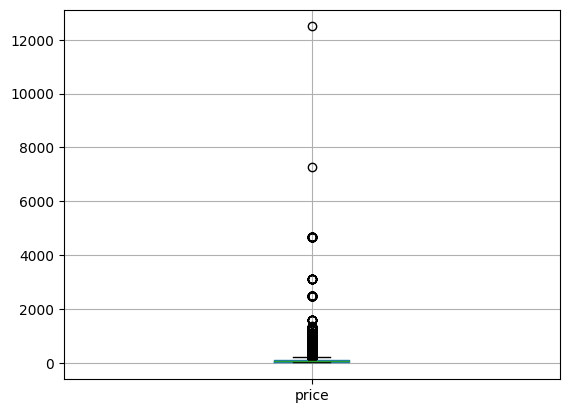

In [11]:
# Cek outlier dengan box plot
merged_df.boxplot(column='price')
plt.show()

In [16]:
# Melihat nilai price, nilai max terlalu jauh dengan data lainnya
merged_df['price'].describe()

count    49695.000000
mean       116.397626
std        204.446316
min         15.000000
25%         47.000000
50%         64.000000
75%        118.000000
max      12494.000000
Name: price, dtype: float64

In [18]:
# Membersihkan outlier

q1 = merged_df['price'].quantile(0.25)
q3 = merged_df['price'].quantile(0.75)

# Hitung interquartile range, upper dan lower limit outlier

iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [19]:
# Filter outlier
merged_df = merged_df[merged_df['price'] > lower_limit]
merged_df = merged_df[merged_df['price'] < upper_limit]

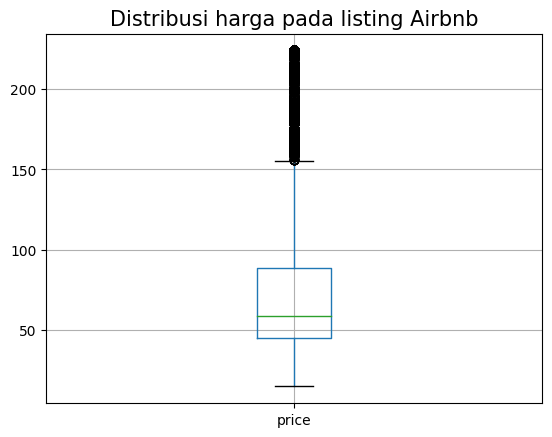

In [113]:
merged_df.boxplot(column='price')
plt.title('Distribusi harga pada listing Airbnb', fontsize=15)
plt.show()

In [21]:
merged_df['price'].describe()

count    44510.000000
mean        75.499753
std         43.673081
min         15.000000
25%         45.000000
50%         59.000000
75%         90.000000
max        224.000000
Name: price, dtype: float64

In [27]:
# Membuat kolom bulan dan tahun
merged_df["bulantahun"] = pd.to_datetime(merged_df['date'], format=("%Y %b")).dt.strftime("%Y %b")
merged_df["bulan"] = pd.to_datetime(merged_df['date'], format=("%B")).dt.strftime("%B")
merged_df["tahun"] = pd.to_datetime(merged_df['date'], format=("%Y")).dt.strftime("%Y")

In [28]:
merged_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,listing_id,date,bulantahun,bulan,tahun
0,5551665,"HVIr1-Holland Village Condo, 1 min away from MRT",25185912,Rebekah,Bukit Timah,1.31269,103.79714,Private room,64,92,364,Central Region,5551665,2019-01-06,2019 Jan,January,2019
1,5551665,"HVIr1-Holland Village Condo, 1 min away from MRT",25185912,Rebekah,Bukit Timah,1.31269,103.79714,Private room,64,92,364,Central Region,5551665,2019-01-31,2019 Jan,January,2019
2,5551665,"HVIr1-Holland Village Condo, 1 min away from MRT",25185912,Rebekah,Bukit Timah,1.31269,103.79714,Private room,64,92,364,Central Region,5551665,2019-02-27,2019 Feb,February,2019
3,5551665,"HVIr1-Holland Village Condo, 1 min away from MRT",25185912,Rebekah,Bukit Timah,1.31269,103.79714,Private room,64,92,364,Central Region,5551665,2019-05-01,2019 May,May,2019
4,5551665,"HVIr1-Holland Village Condo, 1 min away from MRT",25185912,Rebekah,Bukit Timah,1.31269,103.79714,Private room,64,92,364,Central Region,5551665,2019-07-19,2019 Jul,July,2019


In [24]:
# Data quality check
# Apakah ada duplikat
merged_df.duplicated().tolist().count(True)

# Hapus duplikat
merged_df.drop_duplicates(inplace=True)

# Rechecking duplikat
merged_df.duplicated().tolist().count(True)


0

In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44100 entries, 0 to 49694
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   44100 non-null  int64         
 1   name                 44100 non-null  object        
 2   host_id              44100 non-null  int64         
 3   host_name            44100 non-null  object        
 4   neighbourhood        44100 non-null  object        
 5   latitude             44100 non-null  float64       
 6   longitude            44100 non-null  float64       
 7   room_type            44100 non-null  object        
 8   price                44100 non-null  int64         
 9   minimum_nights       44100 non-null  int64         
 10  availability_365     44100 non-null  int64         
 11  neighbourhood_group  44100 non-null  object        
 12  listing_id           44100 non-null  int64         
 13  date                 44100 non-

# Analysis rental trend

In [30]:
sewa_bulantahun = merged_df.groupby('bulantahun')['bulantahun'].count()
sewa_blntahun_df = pd.DataFrame({'bulantahun':sewa_bulantahun.index, 'count':sewa_bulantahun.values})
sewa_blntahun_df.head()

,bulantahun,count
0,2018 Apr,480
1,2018 Aug,641
2,2018 Dec,863
3,2018 Feb,380
4,2018 Jan,405


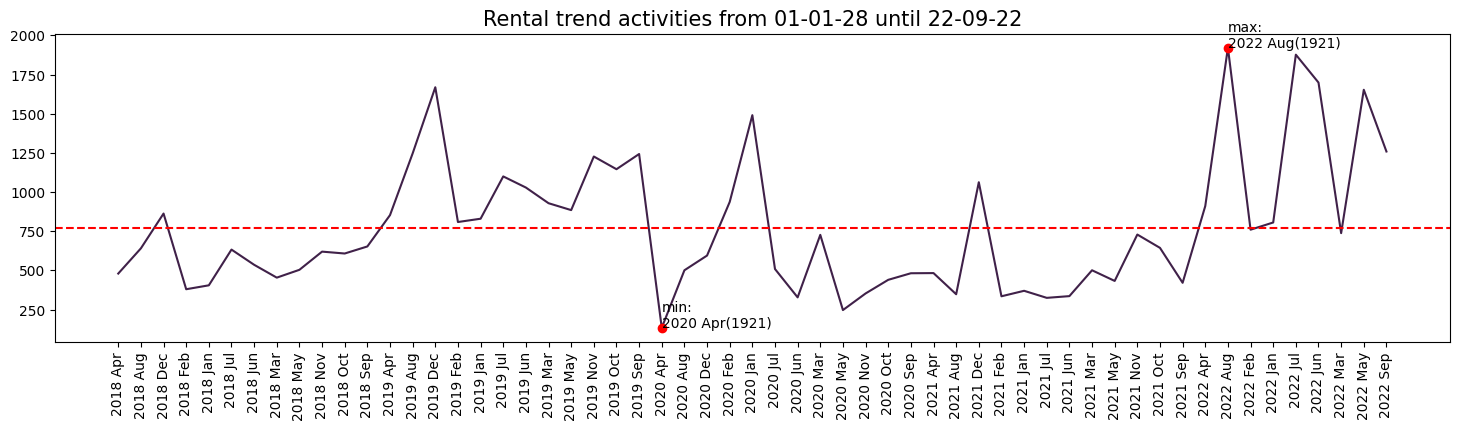

In [99]:
x = sewa_blntahun_df['bulantahun']
y = sewa_blntahun_df['count'].tolist()

plt.subplots(figsize=(18,4))
plt.plot(x, y, color='#402149')

plt.xticks(fontsize=10, rotation=90)
plt.title('Rental trend activities from 01-01-28 until 22-09-22', fontsize=15)

# Annotate max
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.plot(xmax, ymax,'ro')
plt.text(xmax, ymax+3, 'max:' + '\n'+str(xmax)+'('+str(ymax)+')')

# Annotate min
ymin = min(y)
xpos = y.index(ymin)
xmin = x[xpos]
plt.plot(xmin, ymin, 'ro')
plt.text(xmin, ymin, 'min:' + '\n'+str(xmin)+'('+str(ymax)+')')

plt.axhline(y=np.nanmean(y), color='red',linestyle='--', label='Avg')
plt.show()

In [39]:
sewa_bln = merged_df.groupby(['bulan'])['bulan'].count()
sewa_bln_df = pd.DataFrame({'bulan': sewa_bln.index, 'count':sewa_bln.values})

sewa_bln_df["angka"] = pd.to_datetime(sewa_bln_df.bulan, format='%B', errors='coerce').dt.month
sewa_bln_df = sewa_bln_df.sort_values(by="angka")

sewa_bln_df.head()

,bulan,count,angka
4,January,3902,1
3,February,3221,2
7,March,3349,3
0,April,2861,4
8,May,3722,5


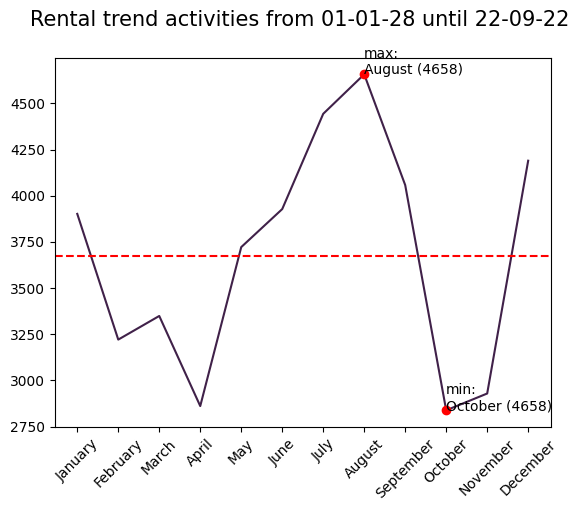

In [100]:
x = sewa_bln_df['bulan'].tolist()
y = sewa_bln_df['count'].tolist()

plt.subplots()
plt.plot(x, y, color='#402149')

plt.xticks(fontsize=10, rotation=45)
plt.title('Rental trend activities from 01-01-28 until 22-09-22 \n', fontsize=15)

# Annotate max
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.plot(xmax, ymax, 'ro')
plt.text(xmax, ymax+3, 'max:' + '\n'+str(xmax)+ ' (' + str(ymax) + ')')

# Annotate min
ymin = min(y)
xpos = y.index(ymin)
xmin = x[xpos]
plt.plot(xmin, ymin, 'ro')
plt.text(xmin, ymin, 'min:' + '\n'+str(xmin)+' ('+str(ymax)+ ')')

# Average line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--',label='Avg')

plt.show()

In [46]:
sewa_thn = merged_df.groupby('tahun')['tahun'].count()
sewa_thn_df = pd.DataFrame({'tahun': sewa_thn.index, 'count': sewa_thn.values})
sewa_thn_df.head()

,tahun,count
0,2018,6777
1,2019,12967
2,2020,6744
3,2021,5988
4,2022,11624


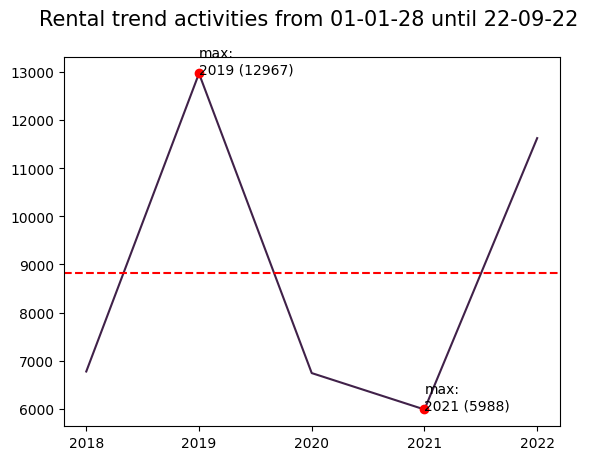

In [101]:
x = sewa_thn_df['tahun']
y = sewa_thn_df['count'].tolist()

plt.subplots()
plt.plot(x, y, color='#402149')

plt.xticks(fontsize=10)
plt.title('Rental trend activities from 01-01-28 until 22-09-22 \n', fontsize=15)

# Annotate max
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.plot(xmax, ymax, 'ro')
plt.text(xmax, ymax+3, 'max:' + '\n'+str(xmax)+' ('+str(ymax)+')')

# Annotate min
ymin = min(y)
xpos = y.index(ymin)
xmin = x[xpos]
plt.plot(xmin, ymin, 'ro')
plt.text(xmin, ymin+3, 'max:' + '\n'+str(xmin)+' ('+str(ymin)+')')

# Average line
plt.axhline(y=np.nanmean(y), color='red', linestyle='--', label='Avg')
plt.show()

#Analysis Region

In [48]:
wilayah_df = merged_df.groupby('neighbourhood_group').agg(count=('neighbourhood_group','count')).sort_values(by=['count'], ascending=False).reset_index()
wilayah_df

,neighbourhood_group,count
0,North Region,22207
1,Central Region,13886
2,West Region,5139
3,East Region,1871
4,North-East Region,997


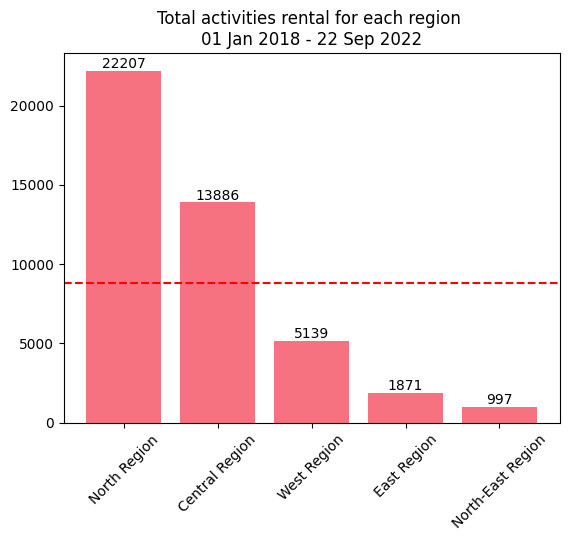

In [112]:
x = wilayah_df['neighbourhood_group'].tolist()
y = wilayah_df['count'].tolist()

def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i], ha="center", va="bottom")

# Membuat bar chart pada data
plt.bar(x, y, color='#F67280')

# Memanggil the function to add value labels
addlabels(x, y)

# Memberikan judul kedalam plot
plt.title('Total activities rental for each region \n01 Jan 2018 - 22 Sep 2022')
plt.xticks(fontsize=10, rotation=45)

# Average line
plt.axhline(y=np.nanmean(y), color='red', linestyle='--', label='Avg')

# Visualisasikan plot
plt.show()

In [52]:
tren_region_df = merged_df[['neighbourhood_group', 'date']].copy()
tren_region_df.sort_values('date', inplace=True)
tren_region_df.head()

,neighbourhood_group,date
17669,Central Region,2018-01-01
37,Central Region,2018-01-01
3754,Central Region,2018-01-01
3769,Central Region,2018-01-01
4347,Central Region,2018-01-01


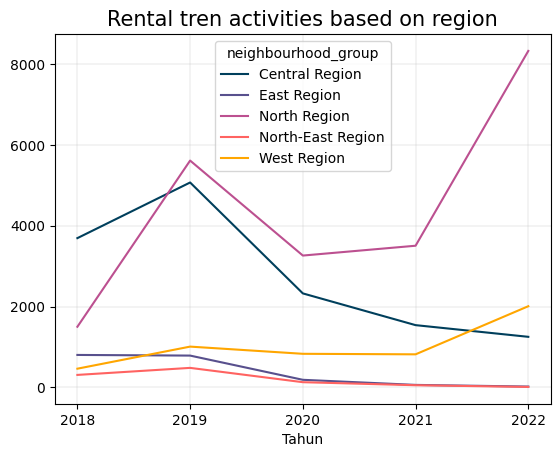

In [103]:
fig, ax = plt.subplots()
tren_region_df.groupby(
    [tren_region_df.date.dt.year, tren_region_df.neighbourhood_group]).count()['date'].unstack().plot(ax=ax,
                                                                                                color=['#003f5c','#58508d', '#bc5090','#ff6361','#ffa600'])

plt.title('Rental tren activities based on region', fontsize=15)
plt.xticks(tren_region_df.date.dt.year.unique().tolist())
plt.xlabel("Tahun")

plt.grid(linewidth=0.20)
plt.show()

In [58]:
harga_wilayah = merged_df[['neighbourhood_group', 'neighbourhood', 'price']].copy()
harga_wilayah = harga_wilayah.drop_duplicates()
harga_wilayah.head()

,neighbourhood_group,neighbourhood,price
0,Central Region,Bukit Timah,64
11,Central Region,Bukit Timah,80
17,Central Region,Bukit Timah,70
21,Central Region,Bukit Timah,77
22,Central Region,Bukit Timah,62


In [65]:
harga_wilayah = harga_wilayah.groupby(['neighbourhood_group','neighbourhood']).mean()['price'].reset_index(name='price')

In [66]:
harga_wilayah_1 = harga_wilayah.drop('neighbourhood', axis=1)
harga_wilayah_1 = harga_wilayah_1.groupby(['neighbourhood_group']).mean().round(2)['price'].reset_index()
harga_wilayah_1 = harga_wilayah_1.sort_values('price', ascending=False)
harga_wilayah_1

,neighbourhood_group,price
0,Central Region,121.71
1,East Region,105.03
2,North Region,96.27
4,West Region,81.61
3,North-East Region,79.47


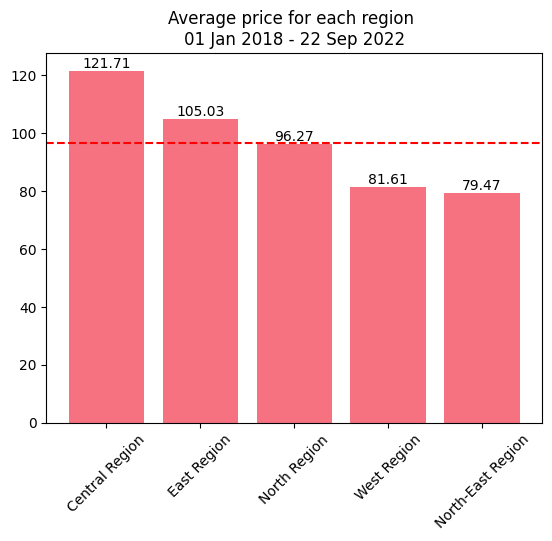

In [104]:
x = harga_wilayah_1['neighbourhood_group'].tolist()
y = harga_wilayah_1['price'].tolist()

def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i], ha="center", va="bottom")

# Membuat bar chart pada data
plt.bar(x, y, color= '#F67280')

# Memanggil fungsi untuk menambahkan nilai labels
addlabels(x, y)

# Memberikan judul pada plot
plt.title('Average price for each region \n01 Jan 2018 - 22 Sep 2022')
plt.xticks(fontsize=10, rotation=45)

# Average line
plt.axhline(y=np.nanmean(y), color='red',linestyle='--', label='Avg')

plt.show()

In [75]:
harga_wilayah_2 = harga_wilayah.groupby(['neighbourhood_group']).count()['neighbourhood'].reset_index()
neighbourhood_total = neighbor_df.groupby(['neighbourhood_group']).count()['neighbourhood'].reset_index()
harga_wilayah_2 = harga_wilayah_2.merge(neighbourhood_total, on='neighbourhood_group')
harga_wilayah_2['neighbourhood_not'] = harga_wilayah_2['neighbourhood_y'] - harga_wilayah_2['neighbourhood_x']
harga_wilayah_2 = harga_wilayah_2.rename(
    columns={'neighbourhood_x': 'neighbourhood', 'neighbourhood_y': 'neighbourhood_total'})
harga_wilayah_2 = harga_wilayah_2.sort_values('neighbourhood', ascending=False)
harga_wilayah_2

,neighbourhood_group,neighbourhood,neighbourhood_total,neighbourhood_not
0,Central Region,18,22,4
4,West Region,7,12,5
2,North Region,6,8,2
3,North-East Region,6,7,1
1,East Region,3,6,3


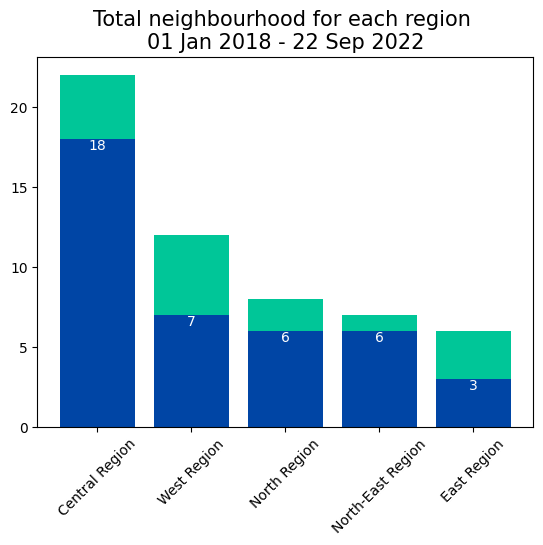

In [107]:
x = harga_wilayah_2['neighbourhood_group'].tolist()
y1 = harga_wilayah_2['neighbourhood'].tolist()
y2 = harga_wilayah_2['neighbourhood_not'].tolist()

def addlabels(x,y,va):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center", va=va, color='w')

# Membuat barchart pada data
plt.bar(x, y1, color='#0045a5')
plt.bar(x, y2, bottom=y1, color='#00c698')

# Memanggil fungsi untuk menambahkan nilai labels
addlabels(x, y1, 'top')

# Memberikan judul pada plot
plt.title('Total neighbourhood for each region \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# visualizing the plot
plt.show()

#Analysis room type

In [79]:
#Melihat hasil distribusi harga listing airbnb setelah cleaning outlier
type_room = merged_df.groupby('room_type')['date'].count()
type_room_df = pd.DataFrame(type_room).reset_index()
type_room_df = type_room_df.sort_values('date', ascending=False)
type_room_df

,room_type,date
0,Entire home/apt,30635
2,Private room,11051
1,Hotel room,1685
3,Shared room,729


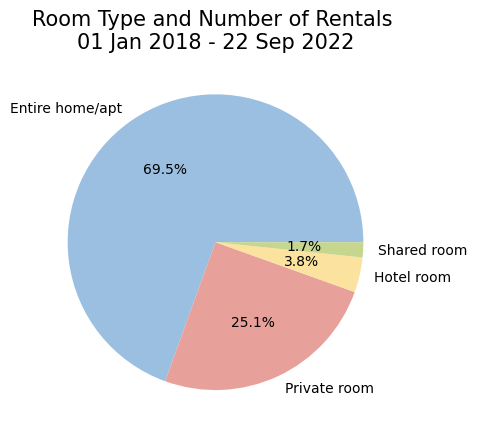

In [108]:
plt.pie(type_room_df['date'], labels=type_room_df['room_type'], autopct='%1.1f%%', colors=['#9BBFE0','#E8A09A', '#FBE29F','#C6D68F','#4C4C6D'])
plt.title('Room Type and Number of Rentals \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.show()

In [81]:
room_price_df = merged_df[['room_type', 'price']]
room_price_df = room_price_df.groupby(['room_type']).mean().round(2)['price'].reset_index()
room_price_df = room_price_df.sort_values('price')
room_price_df

,room_type,price
3,Shared room,50.81
0,Entire home/apt,74.34
2,Private room,77.20
1,Hotel room,85.53


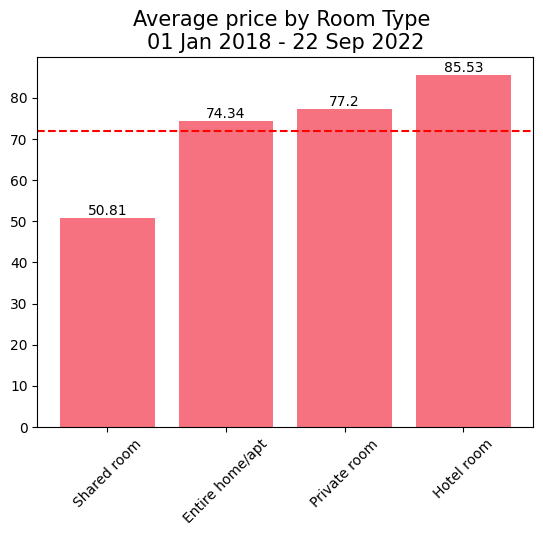

In [109]:
x = room_price_df['room_type'].tolist()
y = room_price_df['price'].tolist()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center", va="bottom")

# Membuat bar chart pada data
plt.bar(x, y, color = '#F67280')

# Memanggil fungsi dan menambahkan nilai pada labels
addlabels(x, y)

# Memberikan judul pada plot
plt.title('Average price by Room Type \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# Average Line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--', label='Avg')

# visualizing the plot
plt.show()

In [88]:
wilayah_room = merged_df[['neighbourhood', 'room_type']].copy()
wilayah_room = wilayah_room.merge(neighbor_df, on='neighbourhood')
wilayah_room = wilayah_room.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='counts')
wilayah_room.head()

,neighbourhood_group,room_type,counts
0,Central Region,Entire home/apt,4577
1,Central Region,Hotel room,1348
2,Central Region,Private room,7250
3,Central Region,Shared room,711
4,East Region,Entire home/apt,402


In [89]:
pivot = pd.pivot_table(data=wilayah_room, index=['neighbourhood_group'], columns=['room_type'], values='counts')
pivot = pivot.sort_values('Entire home/apt', ascending=False)
pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
North Region,20896.0,337.0,962.0,12.0
Central Region,4577.0,1348.0,7250.0,711.0
West Region,4506.0,NaN,632.0,1.0
East Region,402.0,NaN,1469.0,NaN
North-East Region,254.0,NaN,738.0,5.0


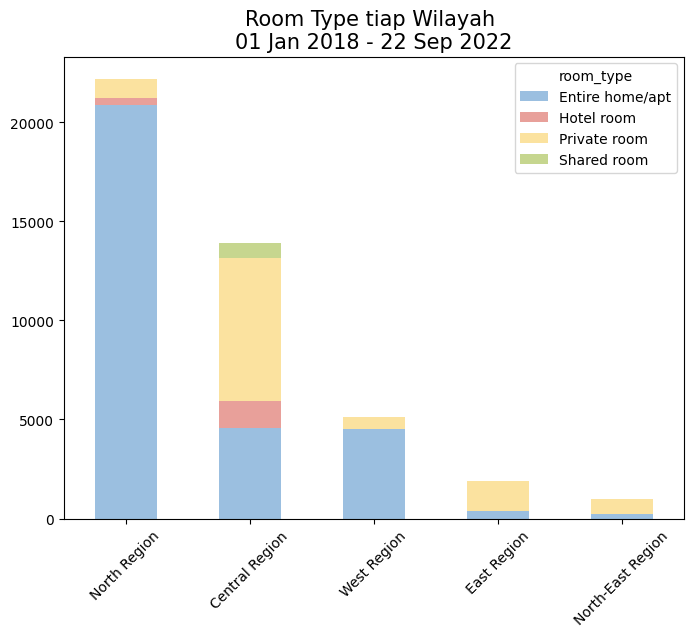

In [110]:
ax = pivot.plot.bar(stacked=True, figsize=(8,6),color=['#9BBFE0','#E8A09A', '#FBE29F','#C6D68F','#4C4C6D'])
plt.title('Room Type tiap Wilayah \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('')
plt.show()

#Distribusi harga

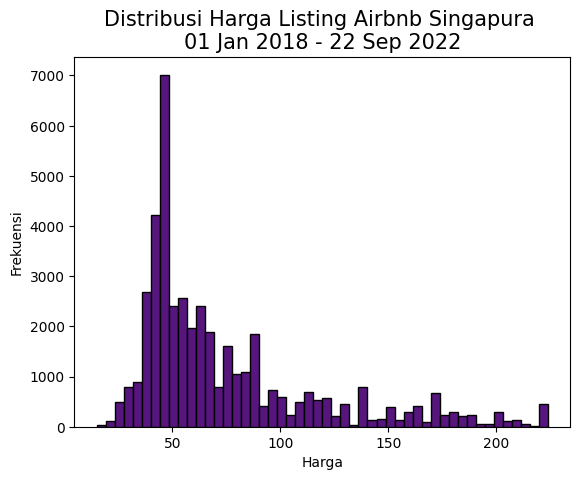

In [111]:
# Membuat histogram harga listing
plt.hist(merged_df['price'], bins=50, color = '#57167E', edgecolor='black')

# Menambahkan label sumbu x dan y
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

# Menambahkan judul
plt.title('Distribusi Harga Listing Airbnb Singapura \n01 Jan 2018 - 22 Sep 2022', fontsize=15)

# Menampilkan plot
plt.show()


In [93]:
check = merged_df['price'].describe()
check

count    44100.000000
mean        75.098821
std         43.402930
min         15.000000
25%         45.000000
50%         59.000000
75%         89.000000
max        224.000000
Name: price, dtype: float64

In [95]:
# Melihat median pada harga
merged_df['price'].median()

59.0

In [96]:
# Melihat mean pada harga
merged_df['price'].mean()

75.098820861678